# Intro to Numpy and Matplotlib

## By Chris

# So what is NumPy?

* NumPy is a Python C extension library for array-oriented computing

# Okay. Why should I use it?

* It is efficient and beautiful.

# Wait.  Why should I trust you?

* You shouldn't.  So let's demo it.

# First: import it.

In [1]:
import numpy as np

## How do we make arrays?

In [8]:
a = np.array([0, 1, 2, 3, 4])
print(a)

[0 1 2 3 4]


In [10]:
print(type(a))

<class 'numpy.ndarray'>


## That's super slow.  Is there any other way?

In [9]:
a = np.arange(0, 100, 2)
print(a)

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96 98]


So in this case `a` is an array of `ints` from $0$ stopping before $100$, counting by twos.

In [12]:
print(a.shape)

(50,)


## Arrays can be n-dimensional, so let's resize this one.

In [17]:
b = a.reshape(2,25)
print(b)

[[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
  48]
 [50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96
  98]]


## Some other important properties:

### `shape` (again)

In [18]:
print(b.shape)

(2, 25)


### `dtype`: Data type

In [19]:
print(b.dtype)

int64


### `itemsize`: length of one array element in bytes

In [20]:
print(b.itemsize)

8


### `size`: number of elements in the array (product of the dimensions)

In [21]:
print(b.size)

50


### `ndim`: number of dimensions

In [22]:
print(b.ndim)

2


## Often overlooked: the `flags`

In [23]:
print(b.flags)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [24]:
print(b.flags.owndata)

False


### This means we're looking at data from `a` in another "view"

In [25]:
b[0,0] = 42
print(a)

[42  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96 98]


So we have to be careful sometimes when working with a view.  If you want a separate copy in memory..

## If you want an actual (new memory) copy:

In [26]:
b = a.copy()

# How else can we initialize arrays?

In [2]:
np.array([2, 3, 4]) #directly

array([2, 3, 4])

In [3]:
np.empty(20, dtype=np.float32) # single precision empty, careful with this

array([  1.09279039e-37,   0.00000000e+00,  -9.14120704e+08,
         4.57622039e-41,  -4.42530202e+09,   4.57622039e-41,
        -6.36240000e+06,   4.57622039e-41,  -2.85893438e+04,
         4.57622039e-41,  -5.26300781e+02,   4.57622039e-41,
         7.19528870e-38,   0.00000000e+00,  -4.29070746e+09,
         4.57622039e-41,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00], dtype=float32)

In [5]:
np.zeros(100) # all zeros

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [6]:
np.ones((3,3), dtype=np.int32) # 3x3 matrix of ones

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [7]:
np.eye(200) # 200 x 200 identity matrix

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [10]:
np.zeros_like(a) # zeros in the shape of a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [13]:
np.linspace(0., 1., 20) # 20 points linearly spaced from 0 to 1

array([ 0.        ,  0.05263158,  0.10526316,  0.15789474,  0.21052632,
        0.26315789,  0.31578947,  0.36842105,  0.42105263,  0.47368421,
        0.52631579,  0.57894737,  0.63157895,  0.68421053,  0.73684211,
        0.78947368,  0.84210526,  0.89473684,  0.94736842,  1.        ])

In [15]:
np.logspace(base=2, start=0, stop=5, num=50) # 50 points log-spaced from 2**0 to 2**5 

array([  1.        ,   1.07329065,   1.15195282,   1.23638019,
         1.3269953 ,   1.42425165,   1.52863599,   1.64067071,
         1.76091654,   1.88997526,   2.02849277,   2.17716233,
         2.33672798,   2.50798829,   2.69180039,   2.88908419,
         3.10082705,   3.32808868,   3.57200647,   3.83380115,
         4.11478293,   4.41635805,   4.74003581,   5.08743612,
         5.46029763,   5.8604864 ,   6.29000526,   6.75100385,
         7.24578931,   7.77683793,   8.34680745,   8.9585504 ,
         9.61512839,  10.31982742,  11.07617429,  11.88795431,
        12.75923023,  13.69436252,  14.69803127,  15.77525955,
        16.93143859,  18.17235475,  19.50421847,  20.93369534,
        22.4679395 ,  24.11462942,  25.88200631,  27.77891541,
        29.81485021,  32.        ])

In [17]:
mag = np.array([[17,24, 1, 8, 15], 
                [23,  5,  7, 14, 16],
                [4,  6, 13, 20, 22],
                [10, 12, 19, 21,  3],
                [11, 18, 25,  2,  9]])

In [19]:
np.sum(mag[0,:])

65

In [20]:
np.sum(mag[:,0])

65

In [22]:
print(np.sum(mag[i,i] for i in range(0,mag.shape[0])))

65


## Indexing

In [24]:
mag

array([[17, 24,  1,  8, 15],
       [23,  5,  7, 14, 16],
       [ 4,  6, 13, 20, 22],
       [10, 12, 19, 21,  3],
       [11, 18, 25,  2,  9]])

In [30]:
mag[::2] # start:stop:step

array([[17, 24,  1,  8, 15],
       [ 4,  6, 13, 20, 22],
       [11, 18, 25,  2,  9]])

In [31]:
mag[0][::-1] # reverse the first row

array([15,  8,  1, 24, 17])

In [32]:
mag.T # transpose

array([[17, 23,  4, 10, 11],
       [24,  5,  6, 12, 18],
       [ 1,  7, 13, 19, 25],
       [ 8, 14, 20, 21,  2],
       [15, 16, 22,  3,  9]])

In [36]:
sorted(mag[mag<10]) # which values are under 10? (Now's a good time to show sorting)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

# Now the more fun stuff: matplotlib

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

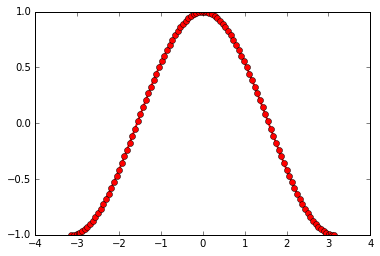

In [42]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.cos(x)
plt.plot(x,y, '-o', c='red', lw=2, label='bla')  # plots a line

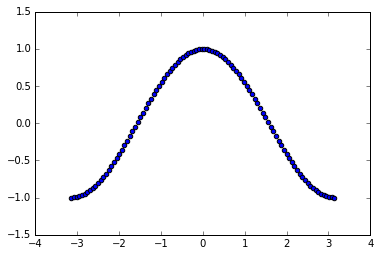

In [43]:
plt.scatter(x,y, s=20, c='blue')

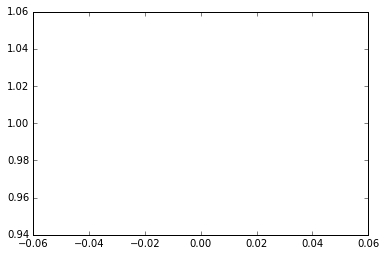

In [45]:
xx, yy, zz = np.zeros((10,10)), np.ones((10,10)), np.eye(10)
plt.pcolormesh(xx, yy, zz, shading='gouraud')